In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def show_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


In [14]:
def draw_polygon(image, vertices, color=(255, 255, 255)):
    polygon_image = image.copy()
    vertices = vertices.astype(int)
    cv2.polylines(polygon_image, [vertices], isClosed=True, color=color, thickness=2)
    return polygon_image


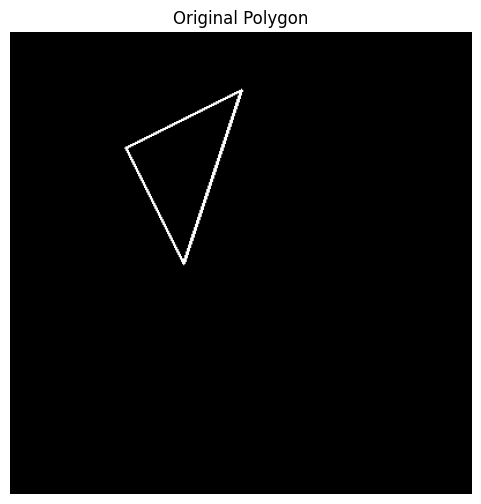

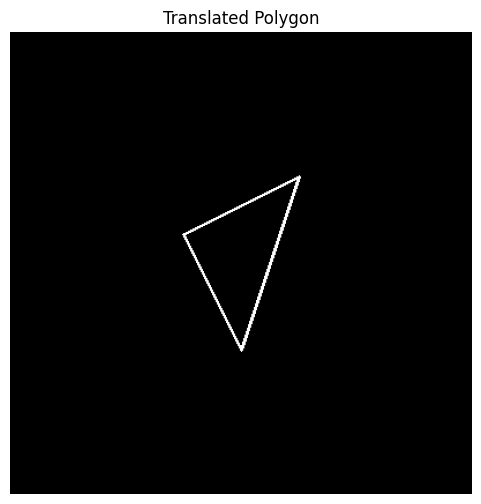

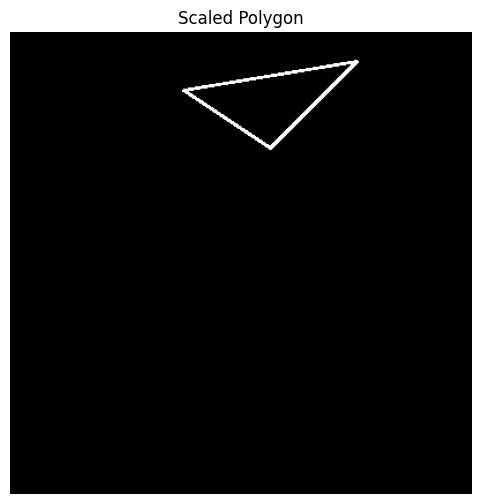

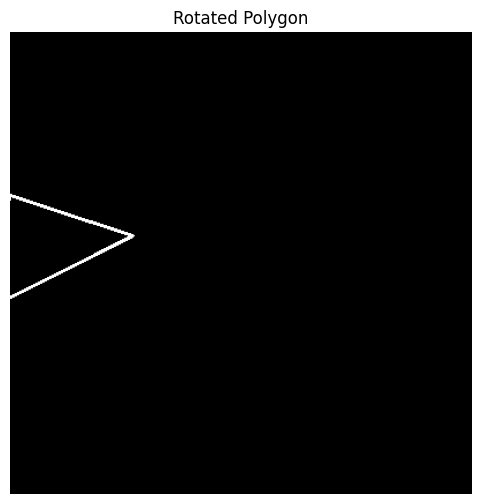

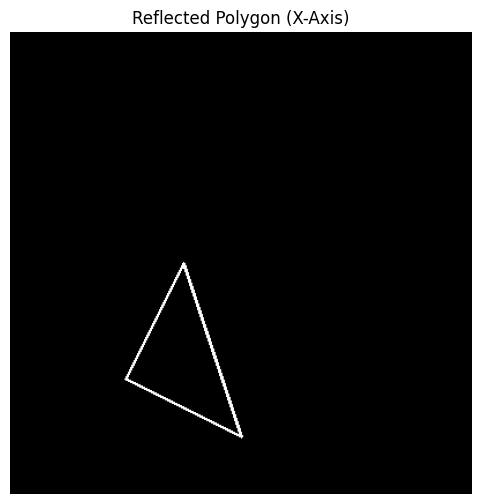

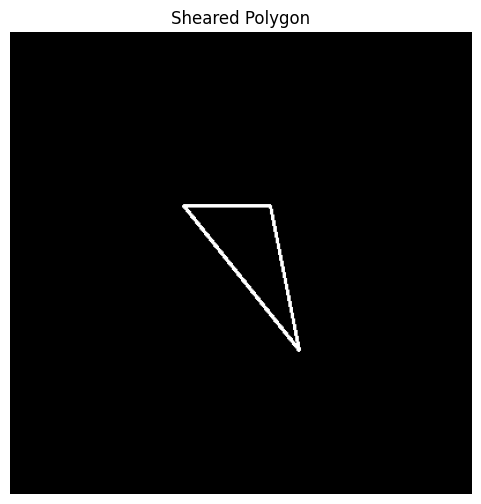

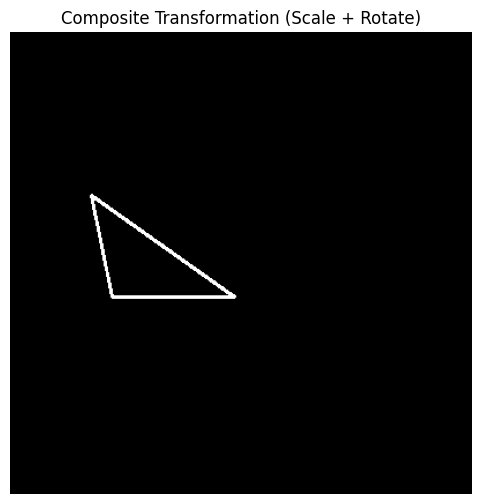

In [11]:
def transform_polygon(vertices, transformation_matrix):
    ones = np.ones((vertices.shape[0], 1))
    homogeneous_vertices = np.hstack([vertices, ones])
    transformed_vertices = homogeneous_vertices @ transformation_matrix.T
    return transformed_vertices[:, :2]

canvas_size = 400
canvas = np.zeros((canvas_size, canvas_size, 3), dtype=np.uint8)

vertices = np.array([[100, 100], [200, 50], [150, 200]], dtype=np.float32)

original_polygon_image = draw_polygon(canvas, vertices)


translation_matrix = np.array([[1, 0, 50], [0, 1, 75], [0, 0, 1]])
translated_vertices = transform_polygon(vertices, translation_matrix)
translated_polygon_image = draw_polygon(canvas, translated_vertices)


scaling_matrix = np.array([[1.5, 0, 0], [0, 0.5, 0], [0, 0, 1]])
scaled_vertices = transform_polygon(vertices, scaling_matrix)
scaled_polygon_image = draw_polygon(canvas, scaled_vertices)


angle = np.radians(45)
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0],
                            [np.sin(angle),  np.cos(angle), 0],
                            [0, 0, 1]])
rotated_vertices = transform_polygon(vertices, rotation_matrix)
rotated_polygon_image = draw_polygon(canvas, rotated_vertices)


reflection_matrix_x = np.array([[1, 0, 0], [0, -1, canvas_size], [0, 0, 1]])
reflected_vertices_x = transform_polygon(vertices, reflection_matrix_x)
reflected_polygon_image_x = draw_polygon(canvas, reflected_vertices_x)

shearing_matrix = np.array([[1, 0.5, 0], [0.5, 1, 0], [0, 0, 1]])
sheared_vertices = transform_polygon(vertices, shearing_matrix)
sheared_polygon_image = draw_polygon(canvas, sheared_vertices)


composite_matrix = rotation_matrix @ scaling_matrix
composite_vertices = transform_polygon(vertices, composite_matrix)
composite_polygon_image = draw_polygon(canvas, composite_vertices)


show_image(original_polygon_image, "Original Polygon")
show_image(translated_polygon_image, "Translated Polygon")
show_image(scaled_polygon_image, "Scaled Polygon")
show_image(rotated_polygon_image, "Rotated Polygon")
show_image(reflected_polygon_image_x, "Reflected Polygon (X-Axis)")
show_image(sheared_polygon_image, "Sheared Polygon")
show_image(composite_polygon_image, "Composite Transformation (Scale + Rotate)")


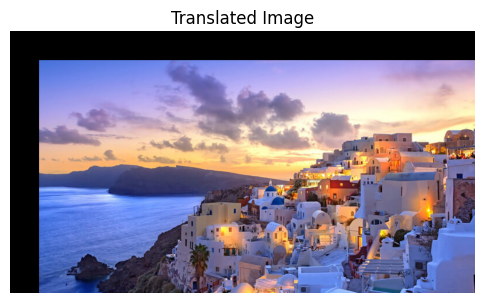

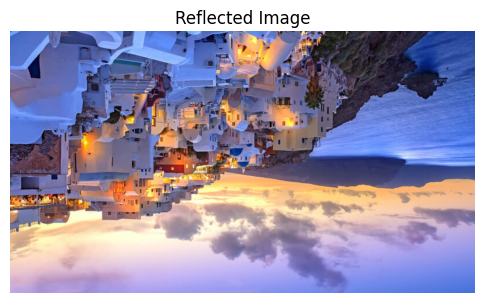

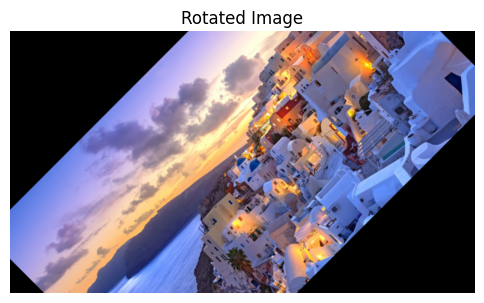

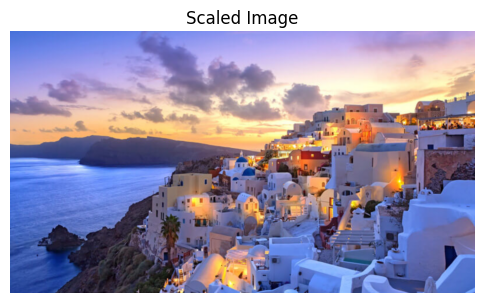

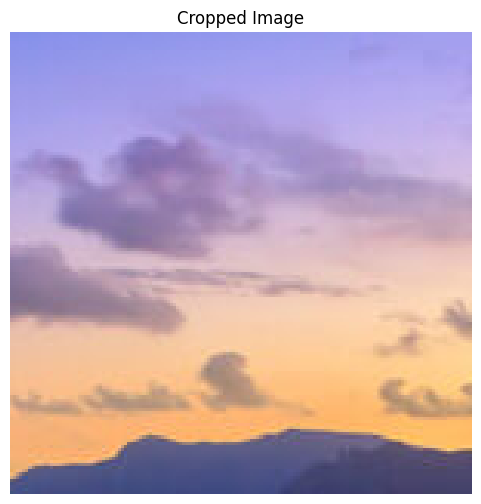

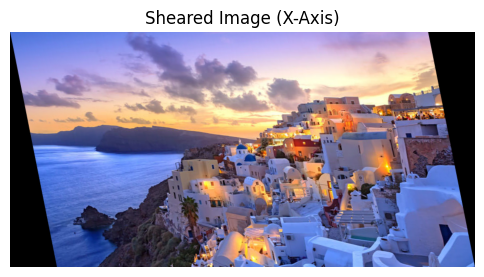

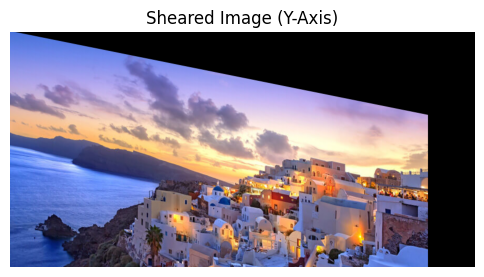

In [15]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


def show_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


image_path = "/content/img.jpg"
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

def reflect_image(image, axis):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    elif axis == 'both':
        reflected_image = cv2.flip(image, -1)
    else:
        raise ValueError("Axis must be 'x', 'y', or 'both'.")
    return reflected_image


def rotate_image(image, angle, scale=1.0):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image


def crop_image(image, x_start, y_start, x_end, y_end):
    cropped_image = image[y_start:y_end, x_start:x_end]
    return cropped_image

# 6. Shearing
def shear_image(image, shear_factor, direction='x'):
    rows, cols = image.shape[:2]
    if direction == 'x':
        shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    elif direction == 'y':
        shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    else:
        raise ValueError("Direction must be 'x' or 'y'.")
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols + int(rows * shear_factor), rows))
    return sheared_image


translated = translate_image(image, tx=50, ty=50)
reflected = reflect_image(image, axis='both')
rotated = rotate_image(image, angle=45)
scaled = scale_image(image, fx=1.5, fy=1.5)
cropped = crop_image(image, x_start=50, y_start=50, x_end=200, y_end=200)
sheared_x = shear_image(image, shear_factor=0.2, direction='x')
sheared_y = shear_image(image, shear_factor=0.2, direction='y')


show_image(translated, "Translated Image")
show_image(reflected, "Reflected Image")
show_image(rotated, "Rotated Image")
show_image(scaled, "Scaled Image")
show_image(cropped, "Cropped Image")
show_image(sheared_x, "Sheared Image (X-Axis)")
show_image(sheared_y, "Sheared Image (Y-Axis)")
